# Predicting house price using machine learning

## Problem Definition
Given house metrics such as population, median income, and median housing price, can we predict the house price?

## Using Pandas to Get Familiar With Our Data

The first step in any machine learning project is familiarize ourselves with the data. We'll use the **Pandas** library for this. Pandas is the primary tool we can use for exploring and manipulating data. Most people abbreviate pandas in their code as `pd`. We do this with the command

In [2]:
import pandas as pd

The most important part of the Pandas library is the DataFrame. A DataFrame holds the type of data we might think of as a table. This is similar to a sheet in Excel or a table in a SQL database.

Pandas has powerful methods for most things we'll want to do with this type of data.

As an example, we'll look at data about home prices in California, USA.

The example (California) data is at the file path ./datasets/housing/california_data.csv.

We load and explore the data with the following commands:

In [3]:
import os

def load_housing_data(housing_path="./datasets/housing/"):
    csv_path = os.path.join(housing_path, "california_data.csv")
    return pd.read_csv(csv_path)

In [4]:
# returns a pandas DataFrame object containing all the data.
housing = load_housing_data()

# display the top five rows using the DataFrame’s head() method
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one **district**. There are 10 attributes (we can see the first 6 in the screenshot): longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity.
    
District is the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The info() method is useful to get a quick description of the data, in particular, the total number of rows, each attribute’s type, and the number of nonnull values

In [5]:
housing.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object (it is a text attribute). When we looked at the top five rows, we probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. We can find out what categories exist and how many districts belong to each category by using the value_counts() method.

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the numerical attributes

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Interpreting Data Description

The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third
quartile).

### Plotting Data
Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or we can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute

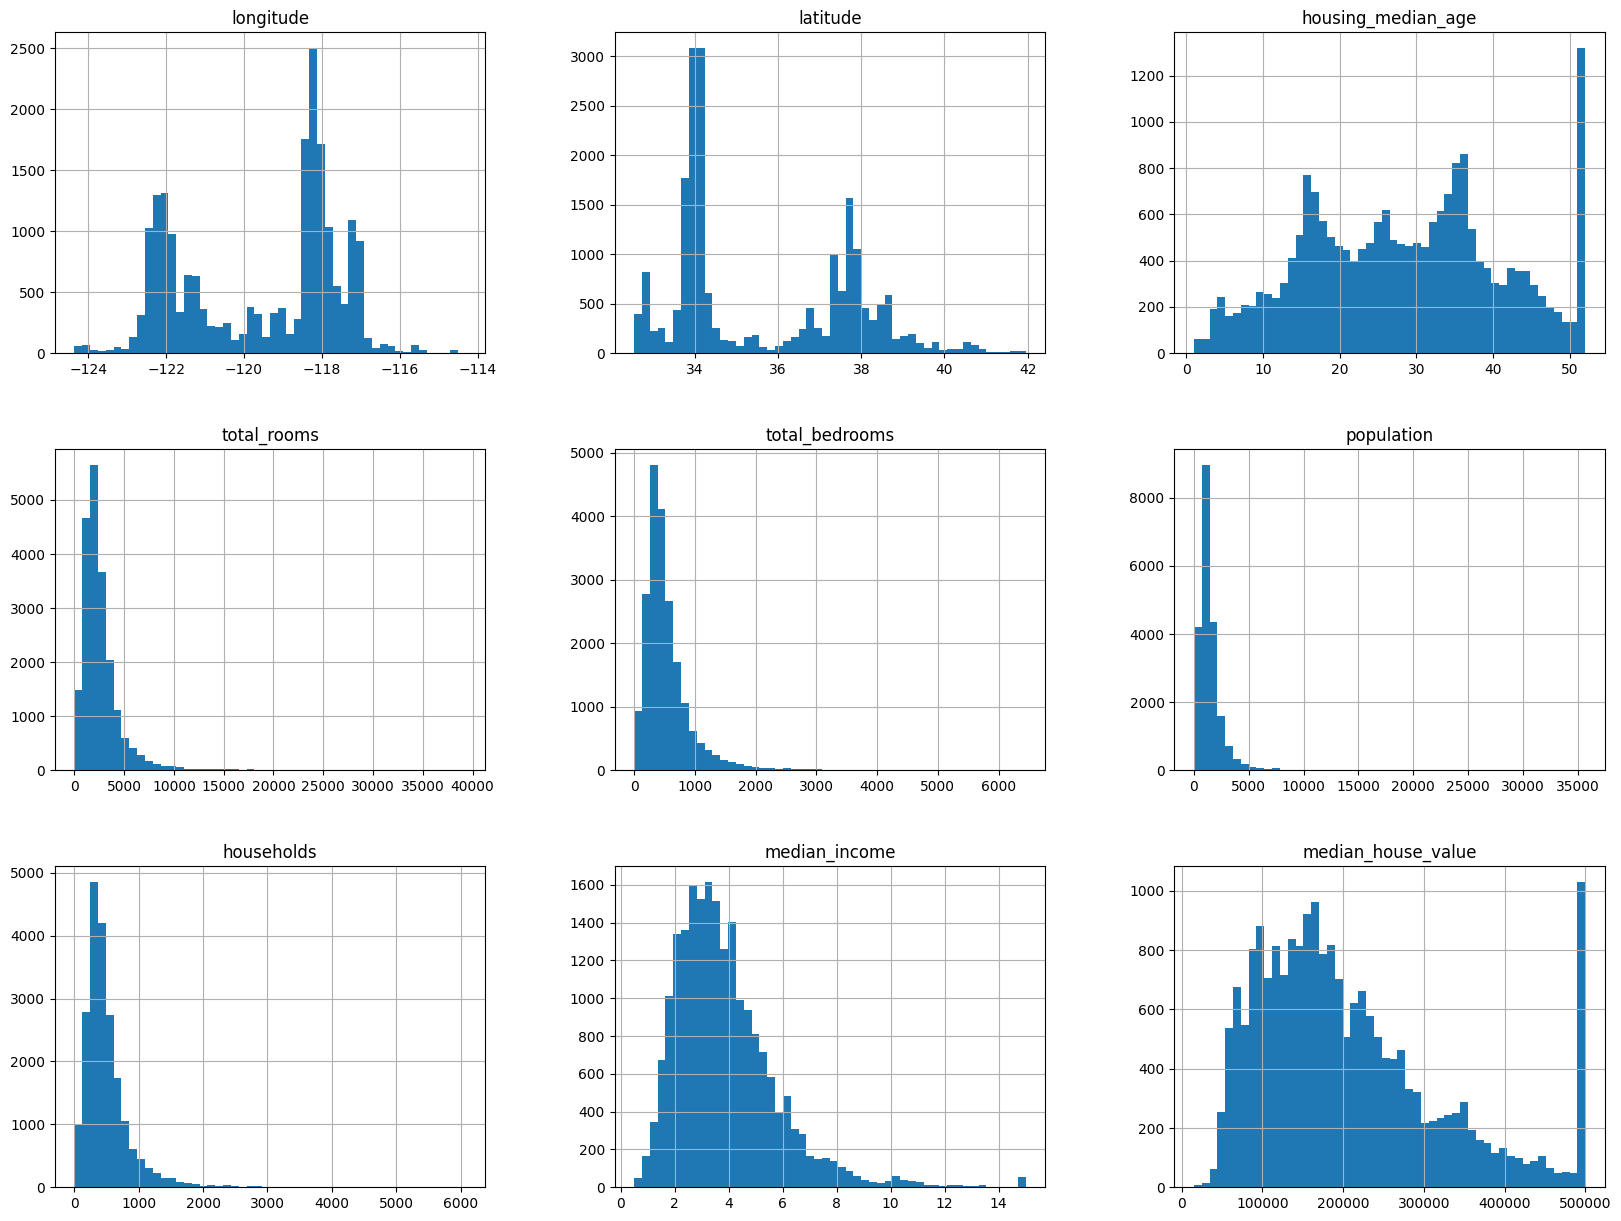

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

There are a few things we need notice

1. The median income attribute has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about \$30,000).
2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is our target attribute (our labels). We may learn that prices never go beyond that limit. We need to check with our client team to see if this is a problem or not. If they tell us that they need precise predictions even beyond \$500,000, then we have two options:
      - Collect proper labels for the districts whose labels were capped.
      - Remove those districts from the training set (and also from the test set, since our system should not be evaluated poorly if it predicts values beyond \$500,000).
3. These attributes have very different scales. We will discuss this later, when we explore feature scaling.
4. Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

## Create a Test Set

Creating a test set allows us to validate the model against fresh data, which is essential for avoiding data snooping bias and detecting overfitting. Creating a test set is theoretically simple: pick some instances randomly, typically
20% of the dataset (or less if our dataset is very large), and set them aside.

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

### Some explanation of the code:

1. np.random.permutation(len(data))
   This function generates a random sequence of numbers.
   - Input: If we pass it an integer N (here, len(data)), it creates an array containing numbers from 0 to N-1.

2. Slicing with [:test_set_size] and [test_set_size:]
   This logic splits the shuffled list of "addresses" into two non-overlapping groups.
   - test_set_size: This is the cutoff point. If we have 100 rows and a 20% test ratio, this number is 20.
   - shuffled_indices[:test_set_size] (The Test Indices): The colon before the variable means "take everything from the start up to (but not including) index 20."
   - shuffled_indices[test_set_size:] (The Train Indices): The colon after the variable means "take everything from index 20 to the end."

3. data.iloc[...]
    iloc stands for Integer Location. It is a Pandas method used to select rows by their position (0 to N-1), regardless of what the actual Index names/labels are.
    - data.iloc[train_indices] looks at the list of random numbers in train_indices (e.g., row 5, row 99, row 2...) and pulls those specific rows out of the DataFrame to create the training set.

We can then use this function like this.

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

16512

In [13]:
len(test_set)

4128

But this method has a problem: if we run the program again, it will generate a different test set! Over time, the Machine Learning algorithms will get to see the whole dataset, which is what we want to avoid.

A common solution is to use a hash of each instance’s unique, immutable identifier to determine the split. By placing instances in the test set only if their hash is $\le$ 20% of the maximum value, the test set remains consistent across runs and updates. This ensures new data is sampled correctly without previous training instances leaking into the test set.

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

### Some explanation of the code:

1. crc32
   This is a hashing function from the zlib library. It calculates a "Cyclic Redundancy Check" value for the input.
   - Purpose: It turns any identifier (like a customer ID number) into a random 32-bit integer.
   - We use this "randomness" to decide if an ID belongs in the test set, rather than using a random number generator which changes every time we run the code.

2. np.int64(identifier)
   This converts the identifier into a NumPy 64-bit integer.
   - Purpose: It ensures that the input passed to crc32 is in a consistent format. If some IDs were strings and some were integers, the hash would act differently. This forces strict typing.

3. & 0xffffffff
   This is a bitwise AND operation with the hexadecimal value for 32 ones.
   - Purpose: It ensures compatibility across different Python versions.
   - In Python 2, crc32 could return a signed integer (meaning it could be negative).
   - In Python 3, it returns an unsigned integer.
   - Applying & 0xffffffff forces the number to be a strictly unsigned 32-bit integer (a number between 0 and 2^{32}-1). It strips the sign bit if it exists.
   
4. test_ratio * 2**32
    This calculates the threshold for the split.
    - Context: The maximum possible value of the crc32 hash (after masking) is 2^{32}-1 (approx 4.3 billion).
    - Logic: If we want a 20% test set (test_ratio = 0.2), we check if the hash is in the bottom 20% of all possible hash values.
    - Calculation: 0.2 * 4,294,967,296 = 858,993,459. If the ID's hash is lower than this number, it goes into the test set.

5. id_ (The Underscore)
    This is a naming convention to avoid shadowing built-in functions. Python has a built-in function called id() that returns the memory address of an object.

6. lambda
    This defines an anonymous (nameless) function inline.
    - Code: lambda id_: test_set_check(id_, test_ratio), which means: "For every single value (which we will call id_) inside the ids column, run the function test_set_check on it."
    - It allows pandas to apply your custom logic to every row in the column.

7. data.loc[~in_test_set], data.loc[in_test_set]
    This performs the final filtering of the DataFrame.
   - in_test_set: This is a Series of True/False values (a boolean) indicating if a row belongs in the test set.
   - data.loc[in_test_set]: Selects all rows where the value is True. (The Test Set).
   - ~: This is the NOT operator (bitwise negation). It flips True to False and vice versa.
   - loc[~in_test_set]: Selects all rows where the value is False. (The Training Set).

Unfortunately, the housing dataset does not have an identifier column. One solution is to combine a district’s latitude and longitude into an ID like:

In [15]:
housing_with_id = housing.copy() # creates a independent copy
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## Data Cleaning
Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this by setting the values to the median.

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. First, we need to create a SimpleImputer instance, specifying that we want to replace each attribute’s missing values with the median of that attribute:

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity

In [17]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we can fit the imputer instance to the training data using the fit() method.

In [18]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.

In [19]:
imputer.statistics_

array([-1.1864000e+02,  3.4400000e+01,  2.9000000e+01,  2.1270000e+03,
        4.3500000e+02,  1.1615000e+03,  4.0900000e+02,  3.5444500e+00,
       -1.1860581e+05])

Now we can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

In [20]:
X = imputer.transform(housing_num)

So far we have only dealt with numerical attributes, but now let’s look at text attributes. In this dataset, there is just one: the ocean_proximity attribute. This attribute is a categorical attribute. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OneHotEncoder class. 

The OneHotEncoder class creates one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16322, 5))

We can get the list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute.

In [22]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers
We create a custom transformer class **CombinedAttributesAdder** to compute and append new features to the dataset automatically. By inheriting from BaseEstimator and TransformerMixin, this class integrates seamlessly with Scikit-Learn pipelines.

Key Features:
- Hyperparameter (add_bedrooms_per_room): Acts as a toggle. This allows us to easily test whether the "bedrooms_per_room" attribute improves our machine learning model's performance.
- Experimentation: This pattern—using hyperparameters to gate specific data preparation steps—allows us to automate feature engineering. We can rapidly try different combinations of features to find the most effective set without manually rewriting code.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

# Indices of the columns we need to access
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        # Calculate new features
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        # Check hyperparameter to decide on the third feature
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # Return original X plus 3 new columns
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            # Return original X plus only 2 new columns
            return np.c_[X, rooms_per_household, population_per_household]

# Example usage (numeric columns only)
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_num.values)

np.c_ is a NumPy shortcut that stacks arrays horizontally (column-wise). 

np.c_[X, rooms_per_household, population_per_household]
- Translates 1D to 2D: It automatically treats the 1D arrays (rooms_per_household and population_per_household) as vertical columns.
- Concatenates: It "pastes" these new columns onto the right side of the existing matrix X.
- Returns: A single, wider 2D matrix containing the original data plus the new features.

## Transformation Pipelines
As we can see, there are many data transformation steps that need to be executed in the right order. And Scikit-Learn provides the Pipeline class to help with such sequences of transformations. 

One of the most important transformations we need to apply to our data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Scikit-Learn provides a transformer called StandardScaler for feature scaling.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

Besides the numerical columns, we also have the categorical columns. Thus, we should use ColumnTransformer to apply all the transformations to the housing training data.

In [25]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model
We got the data and explored it, we sampled a training set and a test set, and we wrote transformation pipelines to clean up and
prepare our data for Machine Learning algorithms automatically. We are now ready to select and train a Machine Learning model.

Before picking an algorithm, notice what we have from the previous steps:
- **Goal/label**: we are predicting `median_house_value`, which is a **continuous value** ⇒ this is a **regression** task.
- **Model-ready features**: after applying `full_pipeline`, we have `housing_prepared` where missing values are handled, useful ratio features are added, numerical features are scaled, and the categorical feature `ocean_proximity` is one-hot encoded.

To connect the data characteristics to model choice, we try three complementary models:
- **Linear Regression**: a simple, fast, and interpretable **baseline**. It helps us check whether a mostly linear relationship (after our feature engineering) is already enough, and it provides a reference RMSE to beat.
- **Decision Tree Regressor**: a non-linear model that can automatically learn **threshold effects** and **feature interactions** (common in real-world housing data). It is more flexible than linear regression, but can easily overfit.
- **Random Forest Regressor**: an **ensemble** of decision trees, which typically generalizes better than a single tree by reducing overfitting. It is often a strong default for tabular data when we suspect non-linearity and interactions.

### First Machine Learning Model - Linear Regression model


In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Done! We now have a working Linear Regression model. Let’s try it out on a few instances from the training set:

In [27]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [403535.81443038 425965.87830988 374246.19546239 316943.70479485
 250032.1847682 ]


In [28]:
print("Labels:", list(some_labels))

Labels: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


It works, although the predictions are not exactly accurate. Let’s measure this regression model’s Root Mean Squared Error (RMSE) on the whole training set using Scikit-Learn’s mean_squared_error() function.

MSE is mathematically convenient for training models, while RMSE is preferred in real projects because it measures prediction error in the same unit as the target, making it easy to interpret and communicate. For example, House price → RMSE = \\$20,000. Stakeholders understand this immediately. MSE like \\$400,000,000 is meaningless to most people.

In [29]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(69343.71847950728)

It means that a typical prediction error is "\\$69,343". Since most districts’ median_housing_values range between \\$120,000 and \\$265,000, this prediction is not very satisfying.  This is an example of a model underfitting the training data. When this happens, it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

### Second Machine Learning Model - Decision Tree model
let’s try a more complex model (DecisionTreeRegressor) to see how it does. 

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

No error at all?! This can happen with a very flexible model like a Decision Tree.

**Important:** this RMSE was computed on the *same training data* the model was fit on (`housing_prepared` / `housing_labels`). So this number is **training error**, not a measure of how well the model will generalize to unseen data.

### Cross-Validation

During cross-validation, we split the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

If we run `fit_transform()` on the full dataset before cross-validation, steps like imputation and scaling would learn statistics (medians/means/categories) from the validation fold, which is data leakage. A `Pipeline(preprocess + model)` ensures preprocessing is fitted only on the training part of each fold, then applied to the validation part.

**Why do we set `random_state=42`?**

Many algorithms contain randomness (e.g., Decision Trees use randomized tie-breaking; Random Forests also use random row/feature sampling). Setting `random_state` fixes the random seed so you (and your classmates) get the same results each run, making comparisons and debugging reproducible. The number `42` is just a commonly used arbitrary seed—you can use any integer.

In [31]:
from sklearn.model_selection import cross_val_score

tree_model = Pipeline([
    ("preprocess", full_pipeline),
    ("model", DecisionTreeRegressor(random_state=42)),
])

scores = cross_val_score(
    tree_model,
    housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
 )
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [76642.42130324 72538.26875585 70911.31768208 69018.62973794
 71882.19494541 70965.14080245 66725.7248226  69549.38489842
 67830.22207419 70263.43444687]
Mean: 70632.67394690448
Standard deviation: 2617.8390662538077




Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! The Decision Tree has a score of approximately 70,632, generally ±2,617.

Let’s compute the same cross-validation scores for the Linear Regression model so we can compare models fairly.

In [32]:
lin_model = Pipeline([
    ("preprocess", full_pipeline),
    ("model", LinearRegression()),
])

lin_scores = cross_val_score(
    lin_model,
    housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
 )
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [74919.54628065 72368.91869256 69412.07060944 69807.68691221
 68628.16864796 69155.3660161  69856.51171249 65026.51732942
 68812.65291203 68535.39855524]
Mean: 69652.28376681013
Standard deviation: 2447.316652396214


It means the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

### Third Machine Learning Model - Random Forest model

Let’s try one last model now: the RandomForestRegressor. Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions.

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18796.43440240386)

**!!! Notice**: The code below may take quite a long time to run. If your laptop is not powerful enough, you can skip this step.

In [34]:

forest_model = Pipeline([
    ("preprocess", full_pipeline),
    ("model", RandomForestRegressor(random_state=42)),
])

forest_scores = cross_val_score(
    forest_model,
    housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
 )
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [54218.63898377 51920.03167637 50539.8798213  50356.04037108
 49594.79390932 50737.88426597 46966.41359663 46892.76649865
 52387.6691309  50807.15452016]
Mean: 50442.127277413776
Standard deviation: 2141.6250873859794


This result is much better: Random Forests look very promising.

## Fine-Tune the Model

We note that the score on the training set is still much lower than on the validation sets, meaning that the Random Forest model is still overfitting the training set.  One solution for overfitting is to regularise the model by using hyperparameters.

Manually tuning hyperparameters is tedious and time-consuming. Instead, use Scikit-Learn’s GridSearchCV, which automatically searches for the best combination of hyperparameters by trying specified values and evaluating them using cross-validation.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Pipeline was imported earlier (see the Transformation Pipelines section)

# IMPORTANT: tune a Pipeline(preprocessing + model) to avoid data leakage
forest_model = Pipeline([
    ("preprocess", full_pipeline),
    ("model", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {"model__n_estimators": [3, 10, 30], "model__max_features": [2, 4, 6, 8]},
    {"model__bootstrap": [False], "model__n_estimators": [3, 10], "model__max_features": [2, 3, 4]},
]

grid_search = GridSearchCV(
    forest_model,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
 )

grid_search.fit(housing, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model__max_features': [2, 4, ...], 'model__n_estimators': [3, 10, ...]}, {'model__bootstrap': [False], 'model__max_features': [2, 3, ...], 'model__n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, 

This param_grid tells Scikit-Learn to first evaluate all 3 * 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict.

Then try all 2 * 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using five fold cross validation). In other words, all in all, there will be 18 * 5 = 90 rounds of training!

## Evaluate Your System on the Test Set

Now is the time to evaluate the final model on the test set. To get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set

In [68]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# With a preprocessing+model pipeline, we can call predict() directly on raw features
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(45229.16120307974)